1. **Load the *Dataset* **

In [4]:
# Question 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import matplotlib.pyplot as plt

# Question 1: Load the dataset
data = pd.read_csv('weather_data.csv')  # Replace with your dataset path
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by='date')  # Ensure data is sorted by date


**Explanation:**

The dataset, containing columns date and temperature, is loaed into a Pandas DataFrame.

The date column is converted into a datetime format to ensure proper time-series ordering.

date is sorted to ensure the data is correctly structured for sequential modeling.

**Interpretation:**

 This step is doen to  prepare the raw data for time-series analysis by ensuring proper structure and formatting.

**2. Preprocess the Data**

In [5]:
scaler = MinMaxScaler()
data['temperature_normalized'] = scaler.fit_transform(data[['temperature']])

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


**Explanation:**

Normalization: The temperature values are scaled between 0 and 1 to improve model convergence and prevent bias from large values.

Data Splitting: The dataset is divided into 80% training and 20% testing subsets, preserving sequential order by disabling shuffling.


**Interpretation:**


 Normalization is done so  that features have consistent scaling which is critical for LSTM.
 Splitting is done for the data for model training and evaluation.



**3. Build an LSTM Autoencoder**





In [12]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(sequence_length),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])
model.compile(optimizer='adam', loss='mse')


model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 30, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_4 (RepeatVector)       │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 30, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 30, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 30, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation:**


Encoder: The input sequence is compressed into a latent representation by the first two LSTM layers.
The amount of information retained depends on the size of the latent representation, which in this example is 32.


Decoder: The latent representation is replicated throughout all time steps via the RepeatVector layer.
The sequence is reconstructed by the following two LSTM layers.

Output Layer: The reconstructed sequence is mapped to the original input shape by a TimeDistributed(Dense(1)) layer.

**Interpretation:**

 The autoencoder learns to minimize the reconstruction error, capturing essential temporal features in the latent space.

**4. Train the Model**

In [7]:
history = model.fit(
    X_train, X_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.1706 - val_loss: 0.0276
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0232 - val_loss: 0.0112
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0077 - val_loss: 0.0039
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.

**Explanation:**

The autoencoder is trained to reconstruct the input sequences.
Training runs for 20 epochs with a batch size of 32.
A validation split of 10% monitors overfitting.


**Interpretation:**

 The decreasing training and validation loss indicate successful learning of the input sequence structure.

5. Anomaly **Detection**

In [8]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

threshold = np.mean(test_mae_loss) + 3 * np.std(test_mae_loss)
anomalies = test_data.iloc[sequence_length:][test_mae_loss > threshold]


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


**Explanation:**

Reconstruction Error:
The absolute difference between the original and reconstructed sequences is computed.

Mean Absolute Error (MAE) is used to quantify reconstruction error for each sequence.

Threshold:
A threshold is defined as the mean plus three standard deviations of the reconstruction error.

Anomalies:
Sequences with reconstruction errors exceeding the threshold are flagged as anomalies.

**Interpretation:**

 Days when the temperature substantially deviates from the typical pattern recorded by the autoencoder are referred to as anomalies.


**6. Visualize the Results**

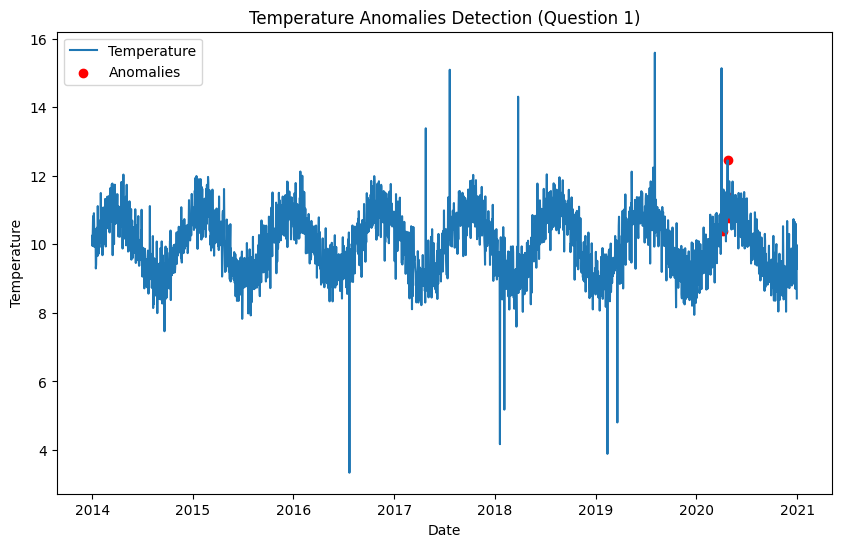

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['temperature'], label='Temperature')
plt.scatter(anomalies['date'], anomalies['temperature'], color='red', label='Anomalies')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Anomalies Detection (Question 1)')
plt.show()


**Explanation:**

The original temperature data is plotted over time.
Anomalies are highlighted with red markers for easy identification.


**Interpretation:**

 The visualization provides a clear representation of temperature trends and highlights anomalies for further analysis.


The blue line represents the actual temperature values over time (from the data['temperature'] column).It shows the trend of daily temperature fluctuations


Detected Anomalies:
he red dots represent the anomalies detected by the LSTM Autoencoder.
These anomalies are identified based on reconstruction errors exceeding a predefined threshold.
When the reconstruction error for a day is significantly higher than normal, it is flagged as an anomaly.

The red dots highlight days where the temperature deviates from the expected pattern








